In [ ]:
import pandas as pd             # Untuk manipulasi dan analisis data I/O dataframe (ex read dataset)
import numpy as np              # Untuk operasi numerik dan komputasi
import matplotlib.pyplot as plt # Untuk visualisasi grafik dan plot
import seaborn as sns           # Dibangun di atas plt, menyediakan visualisasia yang lebih menarik
import warnings                 # Handling peringatan yang ditampilkan
warnings.filterwarnings("ignore")

In [ ]:
! pip install kaggle

In [ ]:
cred = {"username":"andrianang","key":"1e009e3de6ecdd1689030b71caf45830"}

In [ ]:
!mkdir ~/.kaggle/
!touch ~/.kaggle/kaggle.json

api_token = cred
import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [ ]:
! kaggle datasets download -d jp797498e/twitter-entity-sentiment-analysis

twitter-entity-sentiment-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip twitter-entity-sentiment-analysis.zip

Archive:  twitter-entity-sentiment-analysis.zip
replace twitter_training.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

##Reading Train Dataset


In [ ]:
train_df = pd.read_csv('twitter_training.csv')
train_df.columns = ['TweetID', 'Entity', 'Sentiment', 'Content']
train_df

FileNotFoundError: ignored

In [ ]:
train_df.info()

In [ ]:
test_df = pd.read_csv('twitter_validation.csv')
test_df.columns = ['TweetID', 'Entity', 'Sentiment', 'Content']
test_df

,TweetID,Entity,Sentiment,Content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetID    999 non-null    int64 
 1   Entity     999 non-null    object
 2   Sentiment  999 non-null    object
 3   Content    999 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.3+ KB


##Handling Missing Value

In [ ]:
nan_row = train_df[train_df['Content'].isna()]
nan_row

,TweetID,Entity,Sentiment,Content
60,2411,Borderlands,Neutral,NaN
552,2496,Borderlands,Neutral,NaN
588,2503,Borderlands,Neutral,NaN
744,2532,Borderlands,Positive,NaN
1104,2595,Borderlands,Positive,NaN
...,...,...,...,...
73971,9073,Nvidia,Positive,NaN
73972,9073,Nvidia,Positive,NaN
74420,9154,Nvidia,Positive,NaN
74421,9154,Nvidia,Positive,NaN


In [ ]:
train_df.drop(nan_row.index, axis=0, inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73995 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetID    73995 non-null  int64 
 1   Entity     73995 non-null  object
 2   Sentiment  73995 non-null  object
 3   Content    73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


##Remove Duplicate Value

In [ ]:
train_duplicate = train_df[train_df.duplicated(subset=['Entity', 'Sentiment', 'Content'], keep=False)]
train_duplicate

,TweetID,Entity,Sentiment,Content
10,2402,Borderlands,Positive,was
17,2404,Borderlands,Positive,that was the first borderlands session in a lo...
19,2404,Borderlands,Positive,that was the first borderlands session in a lo...
24,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
...,...,...,...,...
74590,9185,Nvidia,Neutral,you
74615,9190,Nvidia,Positive,This news about the Nvidia 3000 series is ligi...
74618,9190,Nvidia,Positive,This news about the Nvidia 3000 series is ligi...
74634,9193,Nvidia,Positive,Love EVERYTHING about it.


In [ ]:
test_duplicate = test_df[test_df.duplicated(subset=['Entity', 'Sentiment', 'Content'], keep=False)]
test_duplicate

,TweetID,Entity,Sentiment,Content


In [ ]:
train_df.drop(train_duplicate.index, axis=0, inplace=True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68590 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetID    68590 non-null  int64 
 1   Entity     68590 non-null  object
 2   Sentiment  68590 non-null  object
 3   Content    68590 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.6+ MB


##Explanatory Data Analysis

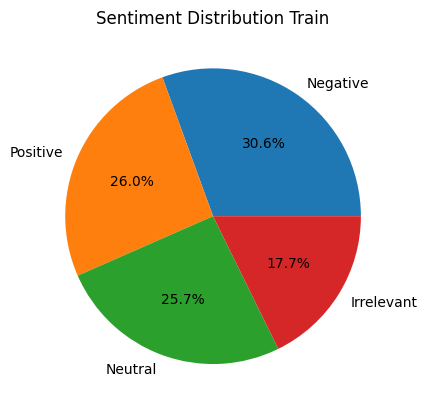

In [ ]:
sentiment_counts = train_df['Sentiment'].value_counts()

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')

plt.title('Sentiment Distribution Train')

plt.show()

In [ ]:
#Word Count
train_df['Word_Count'] = train_df.apply(lambda x: len(str(x['Content']).split()), axis=1)


In [ ]:
# Calculate the mean of the word counts
mean_word_count = train_df['Word_Count'].mean()

# Print the mean word count
print("Mean Word Count:", mean_word_count)

Mean Word Count: 12.85393846571412


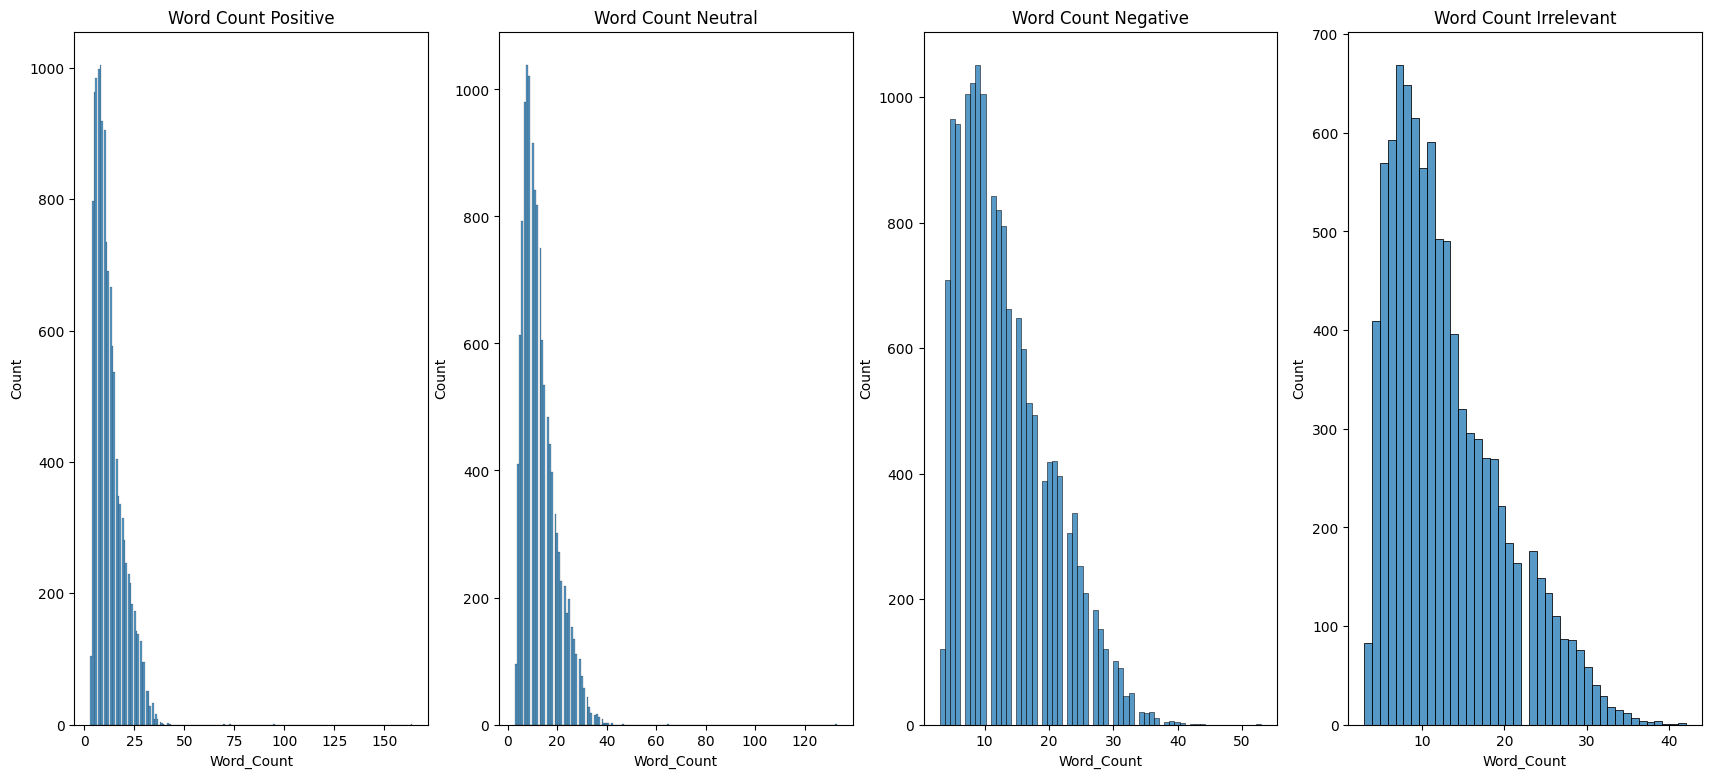

In [ ]:
fig = plt.figure(figsize=(21,9))

n = 1

for i in range(len(train_df['Sentiment'].unique())):
  plt.subplot(1, len(train_df['Sentiment'].unique()), n)
  n += 1
  sns.histplot(x = "Word_Count", data=train_df[train_df['Sentiment'] == train_df['Sentiment'].unique()[i]])
  plt.title(f'Word Count {train_df["Sentiment"].unique()[i]}')
plt.show()

##Analysis Number Of Stopwords

In [ ]:
from wordcloud import STOPWORDS
from collections import Counter
import re

In [ ]:
#POSITIVE

pos_train_df = train_df[train_df["Sentiment"] == "Positive"]["Content"]

pos_train_words = ' '.join(pos_train_df)
pos_train_words = re.sub(r'[^\w\s]', '', pos_train_words.lower())

pos_train_words = pos_train_words.split()

word_freq = Counter(word for word in pos_train_words if word not in STOPWORDS)
word_freq.most_common(10)



[('game', 2172),
 ('im', 1678),
 ('love', 1637),
 ('good', 1494),
 ('really', 1244),
 ('2', 1213),
 ('new', 1161),
 ('now', 1077),
 ('best', 1060),
 ('one', 1015)]

In [ ]:
#NEGATIVE

neg_train_df = train_df[train_df["Sentiment"] == "Negative"]["Content"]

neg_train_words = ' '.join(neg_train_df)
neg_train_words = re.sub(r'[^\w\s]', '', neg_train_words.lower())


neg_train_words = neg_train_words.split()

word_freq = Counter(word for word in neg_train_words if word not in STOPWORDS)
word_freq.most_common(10)

[('game', 3711),
 ('shit', 1413),
 ('now', 1391),
 ('im', 1378),
 ('fix', 1301),
 ('play', 1192),
 ('cant', 1173),
 ('fuck', 1107),
 ('please', 1103),
 ('dont', 1095)]

In [ ]:
#NEUTRAL

neu_train_df = train_df[train_df["Sentiment"] == "Neutral"]["Content"]

neu_train_words = ' '.join(neu_train_df)
neu_train_words = re.sub(r'[^\w\s]', '', neu_train_words.lower())

neu_train_words = neu_train_words.split()

word_freq = Counter(word for word in neu_train_words if word not in STOPWORDS)
word_freq.most_common(10)

[('johnson', 1710),
 ('2', 1268),
 ('game', 1209),
 ('amazon', 1098),
 ('_', 1074),
 ('now', 964),
 ('one', 837),
 ('im', 837),
 ('new', 830),
 ('facebook', 811)]

In [ ]:
#IRRELEVANT

irr_train_df = train_df[train_df["Sentiment"] == "Irrelevant"]["Content"]

irr_train_words = ' '.join(irr_train_df)
irr_train_words = re.sub(r'[^\w\s]', '', irr_train_words.lower())

irr_train_words = irr_train_words.split()

word_freq = Counter(word for word in irr_train_words if word not in STOPWORDS)
word_freq.most_common(10)

[('see', 933),
 ('player', 868),
 ('im', 798),
 ('game', 777),
 ('ban', 737),
 ('people', 715),
 ('one', 644),
 ('4', 640),
 ('good', 639),
 ('love', 638)]

## Convert Lowercase

In [ ]:
train_df['Content'] = train_df['Content'].apply(lambda x: x.lower())

## Detect English

In [ ]:
!pip install py_thesaurus

  Preparing metadata (setup.py) ... done
  Created wheel for py_thesaurus: filename=py_thesaurus-1.0.5-py3-none-any.whl size=6256 sha256=bb79fbbf0fab5ac9710f7ee2bd2d3c4f9a48f148105b9ff60f0bf97c342bcbeb
  Stored in directory: /root/.cache/pip/wheels/5f/87/1d/9928bced500c27041161c6eda1a442f3c747c7187d6df691d8
Successfully built py_thesaurus


## Tokenize Each Word in Content

In [ ]:
train_df['Content']

In [ ]:
import nltk

nltk.download('punkt')

train_df['tokenized_content'] = train_df['Content'].apply(lambda x: nltk.word_tokenize(x))

train_df['tokenized_content']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0        [i, am, coming, to, the, borders, and, i, will...
1        [im, getting, on, borderlands, and, i, will, k...
2        [im, coming, on, borderlands, and, i, will, mu...
3        [im, getting, on, borderlands, 2, and, i, will...
4        [im, getting, into, borderlands, and, i, can, ...
                               ...                        
74676    [just, realized, that, the, windows, partition...
74677    [just, realized, that, my, mac, window, partit...
74678    [just, realized, the, windows, partition, of, ...
74679    [just, realized, between, the, windows, partit...
74680    [just, like, the, windows, partition, of, my, ...
Name: tokenized_content, Length: 68590, dtype: object

In [ ]:
from py_thesaurus import Thesaurus

new_instance = Thesaurus(input_word)

if new_instance.is_word():
    print(f"The word '{input_word}' is in the thesaurus.")
else:
    print(f"The word '{input_word}' is not in the thesaurus.")

In [ ]:
train_df['Content']

0        i am coming to the borders and i will kill you...
1        im getting on borderlands and i will kill you ...
2        im coming on borderlands and i will murder you...
3        im getting on borderlands 2 and i will murder ...
4        im getting into borderlands and i can murder y...
                               ...                        
74676    just realized that the windows partition of my...
74677    just realized that my mac window partition is ...
74678    just realized the windows partition of my mac ...
74679    just realized between the windows partition of...
74680    just like the windows partition of my mac is l...
Name: Content, Length: 68590, dtype: object

###Removing "unk"

In [ ]:
contain_unk = train_df[train_df['Content'] == "<unk>"]

train_df.drop(contain_unk.index, axis=0, inplace=True)


####Remove Non-English

##Modeling


###Bert

In [ ]:
!pip install transformers

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from transformers import TFDistilBertModel, DistilBertTokenizer

In [2]:
train_df = pd.read_csv('processed_train_df.csv')
train_df = train_df[['Entity', 'en_content', 'Sentiment']]
train_df.columns = ['Entity', 'Content', 'Sentiment']
train_df

,Entity,Content,Sentiment
0,Borderlands,"['i', 'am', 'coming', 'to', 'the', 'border', '...",Positive
1,Borderlands,"['i', 'am', 'getting', 'on', 'borderland', 'an...",Positive
2,Borderlands,"['i', 'am', 'coming', 'on', 'borderland', 'and...",Positive
3,Borderlands,"['i', 'am', 'getting', 'on', 'borderland', '2'...",Positive
4,Borderlands,"['i', 'am', 'getting', 'into', 'borderland', '...",Positive
...,...,...,...
51576,Nvidia,"['my', 'be', 'no', 'highlight', 'picture', 're...",Positive
51577,Nvidia,"['just', 'realized', 'that', 'my', 'mac', 'win...",Positive
51578,Nvidia,"['just', 'realized', 'the', 'window', 'partiti...",Positive
51579,Nvidia,"['just', 'realized', 'between', 'the', 'window...",Positive


In [3]:
test_df = pd.read_csv('processed_test_df.csv')
test_df = test_df[['Entity', 'remove_stopwords', 'Sentiment']]
test_df.columns = ['Entity', 'Content', 'Sentiment']
test_df['Content'][0]

"['broadcasting', 'corporation', 'news', 'amazon', 'reject', 'claim', 'company', 'acted', 'like', 'drug', 'dealer']"

In [4]:
from ast import literal_eval

def combine_list(entity, lst):
    actual_list = literal_eval(lst)
    str_list = ' '.join(actual_list)

    return f'{entity.lower()} : {str_list}'

train_df.loc[:, 'Content'] = train_df.apply(lambda x: combine_list(x['Entity'], x['Content']), axis=1)
test_df.loc[:, 'Content'] = test_df.apply(lambda x: combine_list(x['Entity'], x['Content']), axis=1)

In [ ]:
train_irr = train_df[train_df['Sentiment'] == 'Irrelevant']
train_irr

,Entity,Content,Sentiment
71,Borderlands,borderlands : appreciate sonic concept thread ...,Irrelevant
72,Borderlands,borderlands : appreciate sound concept practic...,Irrelevant
73,Borderlands,borderlands : evaluate sound concept concept t...,Irrelevant
74,Borderlands,borderlands : appreciate sonic concept togethe...,Irrelevant
75,Borderlands,borderlands : appreciate sonic electronic conc...,Irrelevant
...,...,...,...
51129,Nvidia,nvidia : based last quarter earnings let see w...,Irrelevant
51130,Nvidia,nvidia : let see well handle next one supply c...,Irrelevant
51131,Nvidia,nvidia : good stuff based earnings last quarte...,Irrelevant
51132,Nvidia,nvidia : 9 good idea based earnings last quart...,Irrelevant


In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertModel
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

# Load and preprocess the data
data_train = train_df[['Content', 'Sentiment']]
data_train['Sentiment_label'] = pd.Categorical(data_train['Sentiment'])
data_train['Sentiment'] = data_train['Sentiment_label'].cat.codes

# Split the data into training and validation sets
data_val = test_df[['Content', 'Sentiment']]
data_val['Sentiment_label'] = pd.Categorical(data_val['Sentiment'])
data_val['Sentiment'] = data_val['Sentiment_label'].cat.codes

# Extract the training and validation texts and labels
train_texts = data_train['Content'].tolist()
train_labels = data_train['Sentiment'].tolist()
val_texts = data_val['Content'].tolist()
val_labels = data_val['Sentiment'].tolist()

# Tokenize the texts
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=16)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=16)

# Convert the labels to one-hot encoding
num_labels = len(data_train['Sentiment_label'].cat.categories)
train_labels_encoded = tf.one_hot(train_labels, num_labels)
val_labels_encoded = tf.one_hot(val_labels, num_labels)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_labels_encoded))
val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings), val_labels_encoded))

# Define the model architecture
input_ids = tf.keras.layers.Input(shape=(16, ), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.layers.Input(shape=(16, ), dtype=tf.int32, name='attention_mask')
output = model(input_ids, attention_mask=attention_mask)[0]
output = tf.keras.layers.Dense(num_labels, activation='softmax')(output[:, 0, :])  # Pooling the output
model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

# Compile and train the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)  # Set from_logits to False for softmax activation
metrics = ['accuracy']

# Define the ModelCheckpoint callback to save the best weights
checkpoint_filepath = 'version3.h5'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

# Use smaller batch size
batch_size = 32
epochs = 15

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Train the model with early stopping and model checkpoint
history = model.fit(
    train_dataset.batch(batch_size),
    epochs=epochs,
    validation_data=val_dataset.batch(batch_size),
    callbacks=[model_checkpoint]
)

# Evaluate the model
model.evaluate(val_dataset.batch(batch_size))


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Epoch 1/15
   6/1612 [..............................] - ETA: 1:39:27 - loss: 1.7921 - accuracy: 0.1458

16/16 [==============================] - 1s 59ms/step
Validation Set - Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.87      0.76      0.81      1850
    Negative       0.89      0.86      0.87      3168
     Neutral       0.83      0.84      0.84      2631
    Positive       0.78      0.88      0.83      2668

    accuracy                           0.84     10317
   macro avg       0.84      0.83      0.84     10317
weighted avg       0.84      0.84      0.84     10317



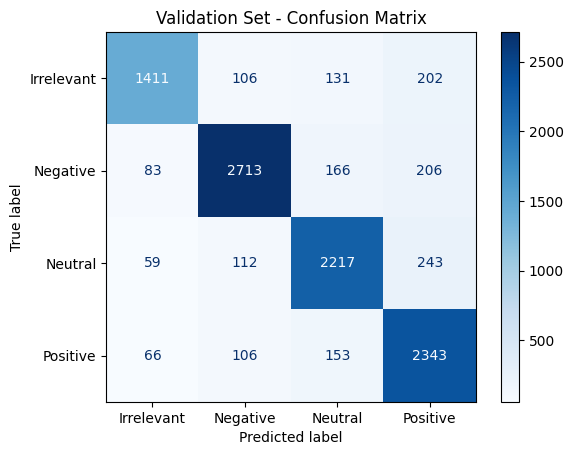

Test Set - Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.92      0.85      0.88       171
    Negative       0.91      0.95      0.93       266
     Neutral       0.93      0.83      0.88       285
    Positive       0.83      0.93      0.88       277

    accuracy                           0.89       999
   macro avg       0.90      0.89      0.89       999
weighted avg       0.90      0.89      0.89       999



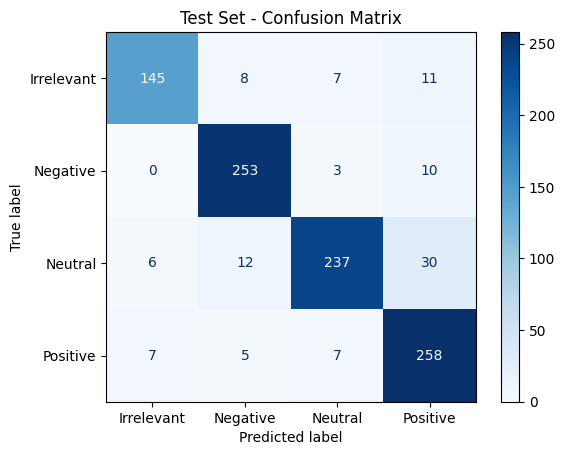

Validation Set - Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.87      0.76      0.81      1850
    Negative       0.89      0.86      0.87      3168
     Neutral       0.83      0.84      0.84      2631
    Positive       0.78      0.88      0.83      2668

    accuracy                           0.84     10317
   macro avg       0.84      0.83      0.84     10317
weighted avg       0.84      0.84      0.84     10317



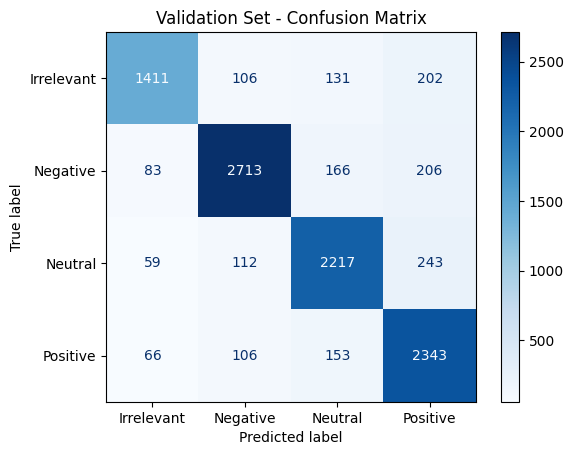

Test Set - Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.92      0.85      0.88       171
    Negative       0.91      0.95      0.93       266
     Neutral       0.93      0.83      0.88       285
    Positive       0.83      0.93      0.88       277

    accuracy                           0.89       999
   macro avg       0.90      0.89      0.89       999
weighted avg       0.90      0.89      0.89       999



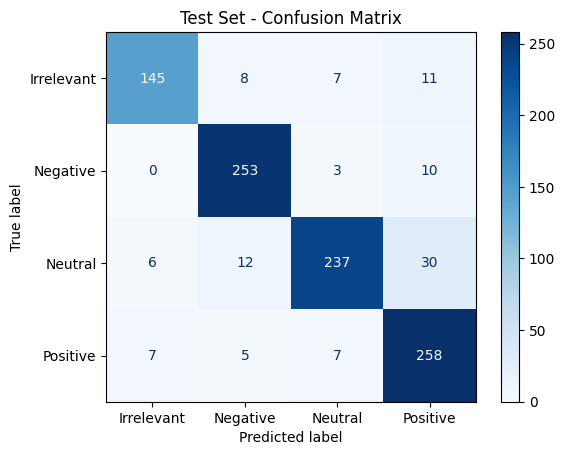

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


# Load and preprocess the data
data_test = test_df[['Content', 'Sentiment']]
data_test['Sentiment_label'] = pd.Categorical(data_test['Sentiment'])
data_test['Sentiment'] = data_test['Sentiment_label'].cat.codes

test_texts = data_test['Content'].tolist()
test_labels = data_test['Sentiment'].tolist()

test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=24)

# Convert the labels to one-hot encoding
num_labels = len(data['Sentiment_label'].cat.categories)
val_labels_encoded = tf.one_hot(val_labels, num_labels)
test_labels_encoded = tf.one_hot(test_labels, num_labels)

# Create TensorFlow datasets
val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings), val_labels_encoded))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), test_labels_encoded))

val_predictions = model.predict(val_dataset.batch(64))
val_predicted_labels = np.argmax(val_predictions, axis=1)
test_predictions = model.predict(test_dataset.batch(64))
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Convert the predicted labels to their original sentiment categories
val_predicted_sentiments = data['Sentiment_label'].cat.categories[val_predicted_labels]
test_predicted_sentiments = data['Sentiment_label'].cat.categories[test_predicted_labels]

# Convert the true labels to their original sentiment categories
val_true_labels = data_val['Sentiment_label']
test_true_labels = data_test['Sentiment_label']

# Calculate the classification report for the validation set
val_classification_rep = classification_report(val_true_labels, val_predicted_sentiments)
print("Validation Set - Classification Report:\n", val_classification_rep)

# Generate the confusion matrix for the valing set
val_confusion_mat = confusion_matrix(val_true_labels, val_predicted_sentiments)

# Get the unique labels/categories from the true labels
labels = np.unique(val_true_labels)

# Plot the confusion matrix for the valing set
val_display = ConfusionMatrixDisplay(confusion_matrix=val_confusion_mat, display_labels=labels)
val_display.plot(cmap='Blues')
plt.title("Validation Set - Confusion Matrix")
plt.grid(False)
plt.show()

# Calculate the classification report for the test set
test_classification_rep = classification_report(test_true_labels, test_predicted_sentiments)
print("Test Set - Classification Report:\n", test_classification_rep)

# Generate the confusion matrix for the test set
test_confusion_mat = confusion_matrix(test_true_labels, test_predicted_sentiments)

# Plot the confusion matrix for the test set
test_display = ConfusionMatrixDisplay(confusion_matrix=test_confusion_mat, display_labels=labels)
test_display.plot(cmap='Blues')
plt.title("Test Set - Confusion Matrix")
plt.grid(False)
plt.show()


val_classification_rep = classification_report(val_true_labels, val_predicted_sentiments)
print("Validation Set - Classification Report:\n", val_classification_rep)

# Save the classification report for the validation set to a file
with open('validation_classification_report.txt', 'w') as file:
    file.write("Validation Set - Classification Report:\n")
    file.write(val_classification_rep)

# Plot the confusion matrix for the validation set
val_display = ConfusionMatrixDisplay(confusion_matrix=val_confusion_mat, display_labels=labels)
val_display.plot(cmap='Blues')
plt.title("Validation Set - Confusion Matrix")
plt.grid(False)
plt.savefig('validation_confusion_matrix.png')  # Save the plot as an image file
plt.show()

# Calculate the classification report for the test set
test_classification_rep = classification_report(test_true_labels, test_predicted_sentiments)
print("Test Set - Classification Report:\n", test_classification_rep)

# Save the classification report for the test set to a file
with open('test_classification_report.txt', 'w') as file:
    file.write("Test Set - Classification Report:\n")
    file.write(test_classification_rep)

# Plot the confusion matrix for the test set
test_display = ConfusionMatrixDisplay(confusion_matrix=test_confusion_mat, display_labels=labels)
test_display.plot(cmap='Blues')
plt.title("Test Set - Confusion Matrix")
plt.grid(False)
plt.savefig('test_confusion_matrix.png')  # Save the plot as an image file
plt.show()

In [ ]:
from transformers import DistilBertModel, DistilBertConfig, DistilBertTokenizer

# Example: Loading a pre-trained DistilBERT model
model_name = 'validation'
model = DistilBertModel.from_pretrained(model_name)

# Save the model weights
model.save_pretrained("path/to/save/model")

# Later, load the model
loaded_model = DistilBertModel.from_pretrained("path/to/save/model")
